In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, ElasticNet, BayesianRidge, LogisticRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.metrics import mean_squared_error, mean_absolute_error
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 30)

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge, ElasticNetCV, ElasticNet, BayesianRidge, LogisticRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [453]:
target_pts = 13.5

In [454]:
linear_reg = LinearRegression()
lasso_cv = LassoCV()
lasso = Lasso()
ridge_cv = RidgeCV()
ridge_reg = Ridge()
elastic_cv = ElasticNetCV()
elastic_net = ElasticNet()
bayesian_ridge = BayesianRidge()
log_regression = LogisticRegression()
sgd_reg = SGDRegressor()
scaler = StandardScaler()

In [455]:
df = pd.read_csv('modeling_data.csv', index_col=[0,1])
df2 = df.copy()

#line_score = 12.5

,,FGM_x,FGA_x,FG_PCT_x,FG3M_x,FG3A_x,FG3_PCT_x,FTM_x,FTA_x,FT_PCT_x,OREB_x,DREB_x,REB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,PTS_x,PLUS_MINUS_x,HOME_x,MIN_y,FGM_y,FGA_y,FG_PCT_y,FG3M_y,FG3A_y,FG3_PCT_y,FTM_y,FTA_y,FT_PCT_y,OREB_y,DREB_y,REB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PTS_y,PLUS_MINUS_y,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,days_rest,rolling_avg,rolling_3pa_avg,min_rolling,rolling_team_fta,rolling_opp_pts,rolling_opp_fga,rolling_team_fga,rolling_fga,rolling_fta,rolling_team_3pa,rolling_team_pts,rolling_team_fg_pct,rolling_stls,TEAM_x_LAC,OPPONENT_x_ATL,OPPONENT_x_BKN,OPPONENT_x_BOS,OPPONENT_x_CHA,OPPONENT_x_CHI,OPPONENT_x_CLE,OPPONENT_x_DAL,OPPONENT_x_DEN,OPPONENT_x_DET,OPPONENT_x_GSW,OPPONENT_x_HOU,OPPONENT_x_IND,OPPONENT_x_LAL,OPPONENT_x_MEM,OPPONENT_x_MIA,OPPONENT_x_MIL,OPPONENT_x_MIN,OPPONENT_x_NOP,OPPONENT_x_NYK,OPPONENT_x_OKC,OPPONENT_x_ORL,OPPONENT_x_PHI,OPPONENT_x_PHX,OPPONENT_x_POR,OPPONENT_x_SAC,OPPONENT_x_SAS,OPPONENT_x_TOR,OPPONENT_x_UTA,OPPONENT_x_WAS,WL_x_L,WL_x_W
,MIN_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10,1,4,0.250,0,2,0.000,2,3,0.667,0,0,0,5,0,0,1,0,4,8,True,240,43,96,0.448,10,39,0.256,13,19,0.684,20,24,44,23,9,7,13,17,109,-1,240,41,88,0.466,6,35,0.171,22,25,0.880,14,32,46,26,7,4,18,14,110,1,2.225352,4.00,2.000000,10.00,19.000000,110.0,88.0,96.000000,4.000000,3.00,39.000000,109.0,0.448000,7.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,26,6,11,0.545,4,8,0.500,6,6,1.000,0,5,5,5,0,0,2,3,22,-20,True,240,41,84,0.488,14,35,0.400,24,24,1.000,11,37,48,26,5,2,16,22,120,2,240,42,88,0.477,11,30,0.367,23,27,0.852,7,29,36,27,10,2,11,16,118,-2,5.000000,13.00,5.000000,18.00,21.500000,114.0,88.0,90.000000,7.500000,4.50,37.000000,114.5,0.468000,8.500000,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,33,4,10,0.400,2,7,0.286,3,3,1.000,0,10,10,15,0,0,5,1,13,19,True,240,51,91,0.560,13,35,0.371,16,18,0.889,8,43,51,32,9,4,15,22,131,29,240,35,91,0.385,9,30,0.300,23,29,0.793,14,29,43,20,11,4,15,16,102,-29,2.000000,13.00,5.666667,23.00,20.333333,110.0,89.0,90.333333,8.333333,4.00,36.333333,120.0,0.498667,9.333333,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,38,6,23,0.261,2,13,0.154,6,7,0.857,1,5,6,8,1,0,1,0,20,4,True,240,34,90,0.378,7,33,0.212,27,32,0.844,7,41,48,22,10,2,7,20,102,2,240,36,83,0.434,11,35,0.314,17,25,0.680,6,45,51,27,3,4,14,19,100,-2,1.000000,14.75,7.500000,26.75,23.250000,107.5,87.5,90.250000,12.000000,4.75,35.500000,115.5,0.468500,7.750000,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,31,1,7,0.143,1,5,0.200,3,4,0.750,1,4,5,8,1,0,5,0,6,-13,False,240,31,76,0.408,11,27,0.407,22,27,0.815,9,29,38,18,6,1,16,21,95,-14,240,39,92,0.424,12,42,0.286,19,25,0.760,20,36,56,29,10,6,10,18,109,14,2.000000,13.00,7.000000,27.60,24.000000,107.8,88.4,87.400000,11.000000,4.60,33.800000,111.4,0.456400,8.200000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
5,36,1,3,0.333,1,3,0.333,3,4,0.750,0,6,6,10,1,0,0,0,6,6,False,240,43,75,0.573,14,29,0.483,30,34,0.882,7,34,41,28,4,5,10,16,130,12,240,44,88,0.500,23,52,0.442,7,11,0.636,5,26,31,32,3,2,9,25,118,-12,2.000000,13.40,7.200000,32.80,27.000000,109.4,88.4,83.200000,10.800000,4.80,31.800000,115.6,0.481400,7.400000,True,False,False,False,True,False,False,

In [456]:
X, y =  df2.drop(columns=['PTS_x']), df['PTS_x']
#y = y.apply(lambda x: 1 if x > target_pts else 0)

    MIN_x
0   10       0
1   26       1
2   33       1
3   38       1
4   31       0
5   36       0
6   37       0
7   39       1
8   34       0
9   34       0
10  36       1
11  36       1
12  36       0
13  34       0
14  36       1
15  34       1
16  39       1
17  37       1
18  34       0
19  25       1
20  40       1
21  35       1
22  39       0
23  29       1
24  40       1
25  32       1
26  36       1
27  38       1
28  39       1
29  42       1
30  34       0
31  33       1
32  39       0
33  27       0
34  35       1
35  39       1
36  38       1
37  41       1
38  36       1
39  28       0
40  34       1
41  30       1
42  39       1
43  29       0
44  36       1
45  31       1
46  44       1
47  40       1
48  29       1
49  34       1
50  39       1
51  28       1
52  28       0
53  42       1
54  28       1
55  37       1
56  34       0
57  32       1
58  35       1
59  37       1
60  39       1
61  36       0
62  28       0
63  37       0
64  36       1
65  28       1


In [457]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=2)
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.fit_transform(X_val.values)
X_train_val.head()

,,FGM_x,FGA_x,FG_PCT_x,FG3M_x,FG3A_x,FG3_PCT_x,FTM_x,FTA_x,FT_PCT_x,OREB_x,DREB_x,REB_x,AST_x,STL_x,BLK_x,TOV_x,PF_x,PLUS_MINUS_x,HOME_x,MIN_y,FGM_y,FGA_y,FG_PCT_y,FG3M_y,FG3A_y,FG3_PCT_y,FTM_y,FTA_y,FT_PCT_y,OREB_y,DREB_y,REB_y,AST_y,STL_y,BLK_y,TOV_y,PF_y,PTS_y,PLUS_MINUS_y,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,days_rest,rolling_avg,rolling_3pa_avg,min_rolling,rolling_team_fta,rolling_opp_pts,rolling_opp_fga,rolling_team_fga,rolling_fga,rolling_fta,rolling_team_3pa,rolling_team_pts,rolling_team_fg_pct,rolling_stls,TEAM_x_LAC,OPPONENT_x_ATL,OPPONENT_x_BKN,OPPONENT_x_BOS,OPPONENT_x_CHA,OPPONENT_x_CHI,OPPONENT_x_CLE,OPPONENT_x_DAL,OPPONENT_x_DEN,OPPONENT_x_DET,OPPONENT_x_GSW,OPPONENT_x_HOU,OPPONENT_x_IND,OPPONENT_x_LAL,OPPONENT_x_MEM,OPPONENT_x_MIA,OPPONENT_x_MIL,OPPONENT_x_MIN,OPPONENT_x_NOP,OPPONENT_x_NYK,OPPONENT_x_OKC,OPPONENT_x_ORL,OPPONENT_x_PHI,OPPONENT_x_PHX,OPPONENT_x_POR,OPPONENT_x_SAC,OPPONENT_x_SAS,OPPONENT_x_TOR,OPPONENT_x_UTA,OPPONENT_x_WAS,WL_x_L,WL_x_W
,MIN_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
38,36,4,14,0.286,2,9,0.222,4,5,0.800,0,1,1,8,2,2,4,3,-3,False,240,36,83,0.434,17,39,0.436,16,18,0.889,7,27,34,28,9,4,11,24,105,-4,240,38,67,0.567,13,26,0.500,20,31,0.645,6,35,41,25,8,5,19,23,109,4,2.0,19.8,8.0,37.8,22.0,112.6,85.6,87.2,14.0,5.0,33.4,122.4,0.5152,6.8,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
15,34,4,10,0.400,4,10,0.400,2,2,1.000,0,11,11,10,1,0,1,2,4,True,240,42,84,0.500,12,35,0.343,16,18,0.889,9,36,45,29,7,6,16,20,112,10,240,37,86,0.430,13,35,0.371,15,19,0.789,12,26,38,27,7,3,12,19,102,-10,1.0,13.4,7.2,35.2,19.4,111.4,86.4,84.0,11.4,1.8,35.8,107.6,0.4650,7.8,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
56,34,2,8,0.250,2,6,0.333,6,7,0.857,0,7,7,8,0,1,2,2,18,False,240,43,88,0.489,15,34,0.441,16,21,0.762,11,29,40,23,8,9,14,18,117,14,240,38,84,0.452,9,31,0.290,18,24,0.750,8,32,40,23,10,10,16,17,103,-14,3.0,17.0,5.2,33.8,25.6,112.8,89.2,86.0,9.8,7.2,32.4,126.6,0.5276,7.6,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
34,35,8,14,0.571,2,7,0.286,4,4,1.000,0,10,10,13,1,1,1,3,27,False,240,48,95,0.505,9,32,0.281,22,24,0.917,12,38,50,29,6,7,11,17,127,20,240,44,96,0.458,6,32,0.188,13,22,0.591,15,30,45,26,6,3,11,18,107,-20,1.0,14.2,6.6,33.6,22.2,111.0,93.6,93.2,11.6,4.4,33.0,122.2,0.4974,4.6,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
66,34,8,11,0.727,2,4,0.500,6,7,0.857,1,8,9,7,0,1,3,1,21,True,240,36,83,0.434,13,34,0.382,21,30,0.700,8,39,47,22,10,7,14,19,106,6,240,38,88,0.432,10,31,0.323,14,20,0.700,12,35,47,24,6,5,17,28,100,-6,3.0,13.8,5.6,32.6,26.4,101.0,89.6,88.6,9.2,6.0,32.8,110.4,0.4512,6.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [458]:
alphavec = 10**np.linspace(-2,2,200)

lasso_cv = LassoCV(alphas = alphavec, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [459]:
lasso_cv.alpha_

0.01

In [460]:
for col, coef in zip(X_train.columns, lasso_cv.coef_):
    print(f"{col:<16}: {coef:>12,.7f}")

FGM_x           :    4.4083961
FGA_x           :    0.0000000
FG_PCT_x        :    0.0000000
FG3M_x          :    1.5691546
FG3A_x          :    0.0000000
FG3_PCT_x       :    0.0000000
FTM_x           :    2.1510657
FTA_x           :    0.0000000
FT_PCT_x        :    0.0000000
OREB_x          :    0.0000000
DREB_x          :    0.0000000
REB_x           :    0.0000000
AST_x           :   -0.0000000
STL_x           :    0.0000000
BLK_x           :    0.0000000
TOV_x           :    0.0000000
PF_x            :    0.0000000
PLUS_MINUS_x    :    0.0000000
HOME_x          :   -0.0000000
MIN_y           :    0.0000000
FGM_y           :    0.0000000
FGA_y           :    0.0000000
FG_PCT_y        :    0.0000000
FG3M_y          :    0.0000000
FG3A_y          :    0.0000000
FG3_PCT_y       :    0.0000000
FTM_y           :    0.0000000
FTA_y           :    0.0000000
FT_PCT_y        :   -0.0000000
OREB_y          :   -0.0000000
DREB_y          :    0.0000000
REB_y           :   -0.0000000
AST_y   

In [461]:
print('R2 for LassoCV Model on train set: ' + str(lasso_cv.score(X_train_scaled, y_train)))

R2 for LassoCV Model on train set: 0.9999964095270298


In [462]:
val_set_preds = lasso_cv.predict(X_val_scaled)


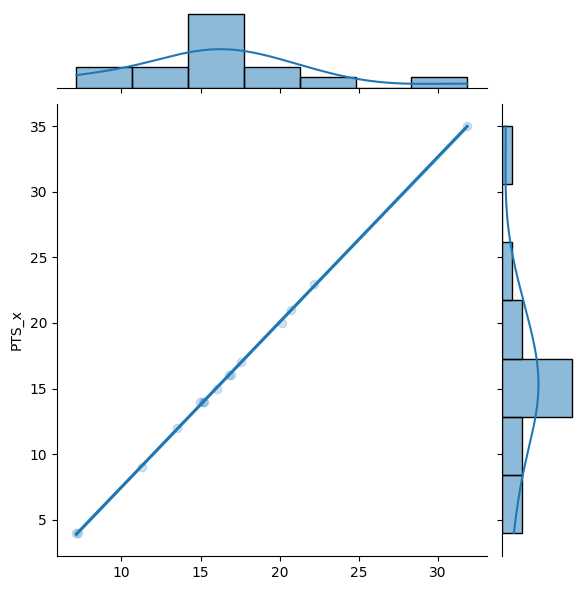

In [463]:
sns.jointplot(x=val_set_preds,y=y_val, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});


In [464]:
print('R2 for LassoCV Model on validation set: ' + str(lasso_cv.score(X_val_scaled, y_val)))


R2 for LassoCV Model on validation set: 0.9438603152269381


In [465]:
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for LassoCV model on validation set: ' + str(mae))

Mean absolute error for LassoCV model on validation set: 1.421122823918867


In [466]:
rmse = mean_squared_error(y_val, val_set_preds, squared=False)
print('Root mean squared error for LassoCV model on validation set: ' + str(rmse))

Root mean squared error for LassoCV model on validation set: 1.7471410342024332


C:\Users\129772\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [467]:
df3 = df[['PTS_x','FGA_x', 'FG_PCT_x', 'FG3A_x', 'FG3_PCT_x', 'FG3_PCT_x', 'FTA_x', 'FT_PCT_x', 'PF_x', 'FG3M_y', 'FG3_PCT_y', 'FGM', 'rolling_avg', 'rolling_fta', 'OPPONENT_x_ATL', 'OPPONENT_x_NYK', 'OPPONENT_x_SAC']]
X, y = df3.drop(columns=['PTS_x']), df['PTS_x']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=4)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [468]:
print('R2 Score for Simple Linear Regression on Training Set using selected features: ' + str(linear_reg.score(X_train, y_train)))


R2 Score for Simple Linear Regression on Training Set using selected features: 0.9632080542321911


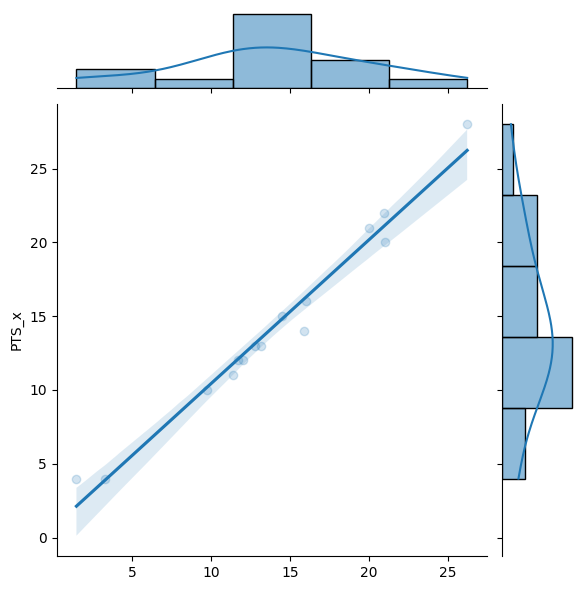

In [469]:
val_set_preds = linear_reg.predict(X_val)
sns.jointplot(x=val_set_preds,y=y_val, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)});

In [470]:
linear_reg.fit(X_train_val, y_train_val)


LinearRegression()

In [471]:
test_set_preds = linear_reg.predict(X_test)


In [472]:
poly = PolynomialFeatures(degree=2)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=4)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)

LinearRegression()

In [473]:
val_set_preds = lr_poly.predict(X_val_poly)
mae = mean_absolute_error(y_val, val_set_preds)
print('Mean absolute error for Polynomial Regression model on validation set: ' + str(mae))
rmse = mean_squared_error(y_val, val_set_preds, squared=False)
print('Root mean squared error for Polynomial Regression model on validation set: ' + str(rmse))
for name, coef in zip(poly.get_feature_names_out(), lr_poly.coef_):
    print(f"{name:<6}: {coef: .3f}")

Mean absolute error for Polynomial Regression model on validation set: 1.9323469083000189
Root mean squared error for Polynomial Regression model on validation set: 2.3471285433599127
1     :  0.000
FGA_x : -0.012
FG_PCT_x:  0.012
FG3A_x: -0.050
FG3_PCT_x:  0.003
FG3_PCT_x:  0.003
FTA_x :  0.037
FT_PCT_x: -0.003
PF_x  : -0.010
FG3M_y:  0.044
FG3_PCT_y:  0.005
FGM   : -0.004
rolling_avg: -0.010
rolling_fta:  0.015
OPPONENT_x_ATL:  0.000
OPPONENT_x_NYK: -0.000
OPPONENT_x_SAC:  0.001
FGA_x^2: -0.053
FGA_x FG_PCT_x:  0.219
FGA_x FG3A_x:  0.081
FGA_x FG3_PCT_x:  0.090
FGA_x FG3_PCT_x:  0.090
FGA_x FTA_x:  0.069
FGA_x FT_PCT_x:  0.083
FGA_x PF_x: -0.008
FGA_x FG3M_y:  0.003
FGA_x FG3_PCT_y:  0.076
FGA_x FGM:  0.030
FGA_x rolling_avg: -0.024
FGA_x rolling_fta: -0.026
FGA_x OPPONENT_x_ATL:  0.005
FGA_x OPPONENT_x_NYK:  0.000
FGA_x OPPONENT_x_SAC:  0.029
FG_PCT_x^2:  0.019
FG_PCT_x FG3A_x:  0.194
FG_PCT_x FG3_PCT_x:  0.016
FG_PCT_x FG3_PCT_x:  0.016
FG_PCT_x FTA_x:  0.079
FG_PCT_x FT_PCT_x:  0.

C:\Users\129772\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [474]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = .25, random_state=6)

In [475]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = .25, random_state=6)
alpha = np.logspace(-4, 2, 100) #np.logspace(-4, -.1, 20)
param_grid = dict(alpha=alpha)
grid_en = GridSearchCV(ElasticNet(), param_grid=param_grid, 
                    scoring='neg_mean_absolute_error', cv = 5)
grid_result_en = grid_en.fit(X_train, y_train)


print('Best Score: ', grid_result_en.best_score_)
print('Best Param: ', grid_result_en.best_params_)

Best Score:  -1.3728133408943854
Best Param:  {'alpha': 0.0010722672220103231}


In [476]:
elastic_cv = ElasticNetCV(alphas = [0.0021544346900318843], cv=5, random_state=0);
elastic_cv.fit(X_train, y_train)
print('ElasticNet Mean R Squared Score on training data: ', elastic_cv.score(X_train, y_train))

ElasticNet Mean R Squared Score on training data:  0.9812824476545118


In [477]:
val_set_preds = elastic_cv.predict(X_val)

In [478]:
lr_preds = linear_reg.predict(X)
df['predictions'] = lr_preds; df

C:\Users\129772\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: at least one array or dtype is required